In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/main/ch2_iir_nci_20210622T1256344234_d_img_d32.zip" -d "content/drive/MyDrive/IIRS_dataset2/"

Archive:  /content/drive/MyDrive/main/ch2_iir_nci_20210622T1256344234_d_img_d32.zip
   creating: content/drive/MyDrive/IIRS_dataset2/data/
   creating: content/drive/MyDrive/IIRS_dataset2/data/calibrated/
   creating: content/drive/MyDrive/IIRS_dataset2/data/calibrated/20210622/
  inflating: content/drive/MyDrive/IIRS_dataset2/data/calibrated/20210622/ch2_iir_nci_20210622T1256344234_d_img_d32.xml  
  inflating: content/drive/MyDrive/IIRS_dataset2/data/calibrated/20210622/ch2_iir_nci_20210622T1256344234_d_img_d32.qub  
  inflating: content/drive/MyDrive/IIRS_dataset2/data/calibrated/20210622/ch2_iir_nci_20210622T1256344234_d_img_d32.hdr  
   creating: content/drive/MyDrive/IIRS_dataset2/geometry/
   creating: content/drive/MyDrive/IIRS_dataset2/geometry/calibrated/
   creating: content/drive/MyDrive/IIRS_dataset2/geometry/calibrated/20210622/
  inflating: content/drive/MyDrive/IIRS_dataset2/geometry/calibrated/20210622/ch2_iir_nci_20210622T1256344234_g_grd_d32.xml  
  inflating: content

In [ ]:
# cd ..

/


In [ ]:
# cd drive/MyDrive/IIRS_Main/data/calibrated

[Errno 2] No such file or directory: 'drive/MyDrive/IIRS_Main/data/calibrated'
/


In [ ]:
data_file = "/content/drive/MyDrive/IIRS_dataset2/data/calibrated/20210622/ch2_iir_nci_20210622T1256344234_d_img_d32.qub"
header_file = "/content/drive/MyDrive/IIRS_dataset2/data/calibrated/20210622/ch2_iir_nci_20210622T1256344234_d_img_d32.hdr"
geometry_file = "/content/drive/MyDrive/IIRS_dataset2/geometry/calibrated/20210622/ch2_iir_nci_20210622T1256344234_g_grd_d32.csv"

In [ ]:
!pip install spectral

In [ ]:
import spectral
import os

In [ ]:
pwd

'/'

In [ ]:
data = spectral.io.envi.open(header_file, image=data_file)

In [ ]:
hyperspectral_data = data.load()

In [ ]:
print(f"Shape of the data: {hyperspectral_data.shape}")

Shape of the data: (16592, 250, 256)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten , MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
IMAGES_PATH = Path() / "images" / "hyperspectral"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
hyperspectral_data.shape

(16592, 250, 256)

In [ ]:
def plot_reflectance_variation(x , y):
  if x >= 0 and x < hyperspectral_data.shape[1] and y >= 0 and y < hyperspectral_data.shape[0]:
    reflectance_values = hyperspectral_data[y, x, :]
    plt.figure(figsize = (10 , 6))
    plt.plot(range(hyperspectral_data.shape[2]), reflectance_values.squeeze())
    plt.xlabel('Wavelength')
    plt.ylabel('Reflectance')
    plt.title(f'Reflectance Variation at ({x}, {y})')
    save_fig("reflectance variation vs wavelength")
    plt.show()
  else:
    print("Invalid coordinates")

In [ ]:
# x & y is scan, pixel -> get for coordinates

Enter the x coordinate: 1
Enter the y coordinate: 1


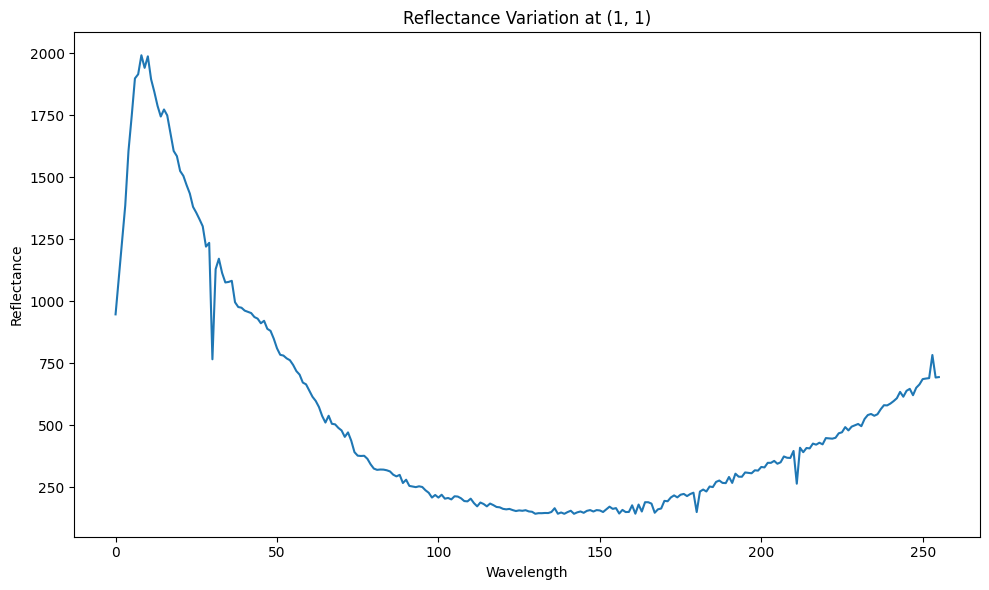

In [ ]:
import matplotlib.pyplot as plt
x = int(input("Enter the x coordinate: "))
y = int(input("Enter the y coordinate: "))
plot_reflectance_variation(x , y)

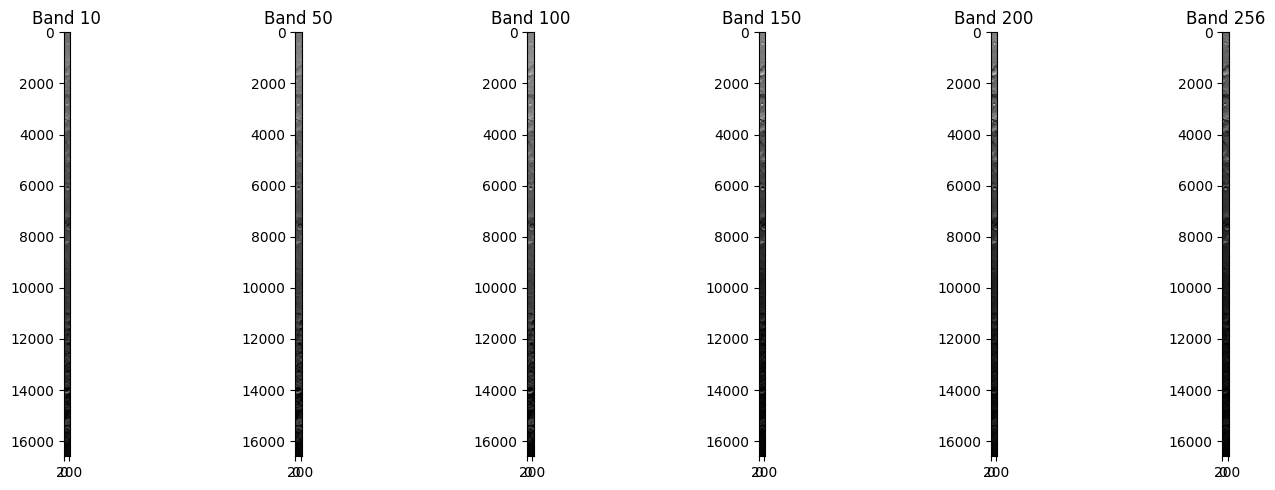

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

axes[0].imshow(hyperspectral_data[:,:,10], cmap='gray')
axes[0].set_title('Band 10')

axes[1].imshow(hyperspectral_data[:,:,50], cmap='gray')
axes[1].set_title('Band 50')

axes[2].imshow(hyperspectral_data[:,:,100], cmap='gray')
axes[2].set_title('Band 100')

axes[3].imshow(hyperspectral_data[:,:,150], cmap='gray')
axes[3].set_title('Band 150')

axes[4].imshow(hyperspectral_data[:,:,200], cmap='gray')
axes[4].set_title('Band 200')

axes[5].imshow(hyperspectral_data[:,:,255], cmap='gray')
axes[5].set_title('Band 256')

save_fig("grayscale image of strip at 6 different bands")

plt.show()

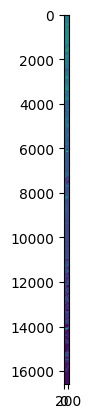

In [ ]:
plt.imshow(hyperspectral_data[:,:,10])

In [ ]:
coordinates = pd.read_csv(geometry_file)

In [ ]:
coordinates.tail(20)

,Longitude,Latitude,Pixel,Scan
1978,34.851324,-86.553166,200,16450
1979,37.268884,-86.539823,249,16450
1980,24.685015,-86.676508,0,16500
1981,27.254860,-86.688965,50,16500
1982,29.837338,-86.694766,100,16500
1983,32.422958,-86.693885,150,16500
1984,35.002155,-86.686332,200,16500
1985,37.514456,-86.672492,249,16500
1986,24.423706,-86.809018,0,16550
1987,27.098564,-86.822010,50,16550


Enter the band: 2


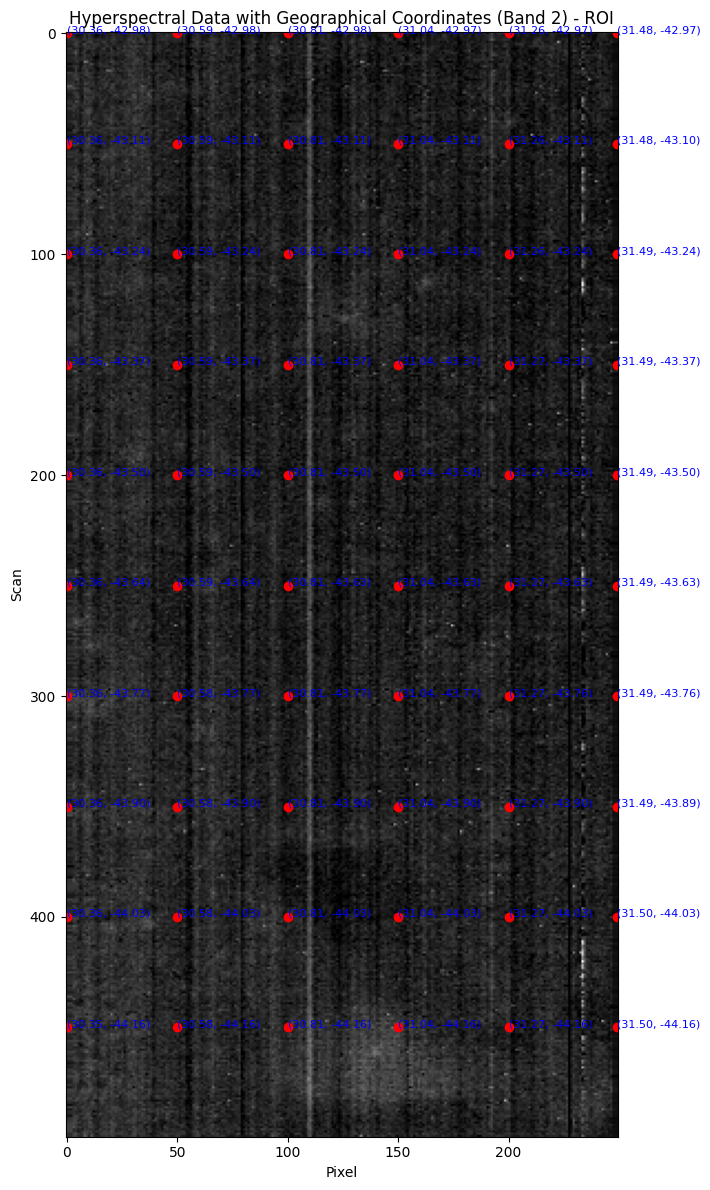

In [ ]:
roi_start_x = 0
roi_end_x = 250
roi_start_y = 0
roi_end_y = 500

def plot_roi_hyperspectral_with_coords(band_index):
    plt.figure(figsize=(20, 12))

    plt.imshow(hyperspectral_data[roi_start_y:roi_end_y, roi_start_x:roi_end_x, band_index], cmap='gray')

    for index, row in coordinates.iterrows():
        pixel = row['Pixel']
        scan = row['Scan']


        if roi_start_x <= pixel < roi_end_x and roi_start_y <= scan < roi_end_y:
            lon = row['Longitude']
            lat = row['Latitude']


            plt.plot(pixel - roi_start_x, scan - roi_start_y, 'ro')
            plt.text(pixel - roi_start_x, scan - roi_start_y, f"({lon:.2f}, {lat:.2f})", color='blue', fontsize=8)

    plt.title(f'Hyperspectral Data with Geographical Coordinates (Band {band_index}) - ROI')
    plt.xlabel('Pixel')
    plt.ylabel('Scan')
    save_fig(f"Image geographical coordinates")
    plt.show()

plot_roi_hyperspectral_with_coords(int(input(f"Enter the band: ")))

In [ ]:
hyperspectral_data.shape

(16592, 250, 256)

In [ ]:
import numpy as np

for i in range(hyperspectral_data.shape[2]):
    var_name = f'band_data_{i + 1}'
    globals()[var_name] = hyperspectral_data[:, :, i].reshape(16592, 250)

In [ ]:
import numpy as np

band_data = {}
normalized_data = {}
flattened_data = {}

for i in range(hyperspectral_data.shape[2]):
    band_data[f'band_data_{i + 1}'] = hyperspectral_data[:, :, i].reshape(16592, 250)

    norm_data = band_data[f'band_data_{i + 1}'] / np.max(band_data[f'band_data_{i + 1}'])
    normalized_data[f'normalized_data_{i + 1}'] = norm_data

    flattened_data[f'flattened_data_{i + 1}'] = norm_data.reshape(-1, norm_data.shape[-1])

# Example usage
print(flattened_data['flattened_data_1'])  # Access flattened data for the first band


normalized_data_256 = band_data_256 / np.max(band_data_256)
flattened_data_256 = normalized_data_256.reshape(-1, normalized_data_256.shape[-1])

pca = PCA(n_components = 10)
reduces_data_256 = pca.fit_transform(flattened_data_256)

explained_variance = np.sum(pca.explained_variance_ratio_)

[[0.11989711 0.11989711 0.11989711 ... 0.00171727 0.00171727 0.00171727]
 [0.07184606 0.07184606 0.07184606 ... 0.         0.         0.        ]
 [0.08248528 0.08248528 0.08248528 ... 0.         0.         0.        ]
 ...
 [0.02100549 0.02100549 0.02100549 ... 0.         0.         0.        ]
 [0.02100549 0.02100549 0.02100549 ... 0.         0.         0.        ]
 [0.02100549 0.02100549 0.02100549 ... 0.         0.         0.        ]]


In [ ]:
print(band_data_256.shape)
normalized_data_256 = band_data_256 / np.max(band_data_256)
flattened_data_256 = normalized_data_256.reshape(-1, normalized_data_256.shape[-1])

pca = PCA(n_components = 10)
reduces_data_256 = pca.fit_transform(flattened_data_256)

explained_variance = np.sum(pca.explained_variance_ratio_)

(16592, 250)


In [ ]:
def find_optimal_components(data, variance_threshold=0.85):
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
    return n_components, cumulative_variance[n_components - 1]

n_components, explained_variance = find_optimal_components(flattened_data_256)
pca = PCA(n_components=n_components)
reduced_data_256 = pca.fit_transform(flattened_data_256)

print(f"Optimal number of components: {n_components}")
print(f"Explained Variance: {explained_variance}")


Optimal number of components: 4
Explained Variance: 0.8588958978652954


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

scaler = StandardScaler()
scaled_reduced_data = scaler.fit_transform(reduced_data_256)

oc_svm = OneClassSVM(gamma='auto', nu=0.05)  # Adjust 'nu' and 'gamma' based on your data
oc_svm.fit(scaled_reduced_data)

anomaly_labels = oc_svm.predict(scaled_reduced_data)

anomaly_indices = np.where(anomaly_labels == -1)[0]

anomalous_data = reduced_data_256[anomaly_indices]

contribution_scores = np.abs(anomalous_data).sum(axis=0)

component_ranking = np.argsort(-contribution_scores)
print("Contribution scores:", contribution_scores)
print("Principal component ranking (most significant first):", component_ranking)

Contribution scores: [2129.9841   856.38995  731.4369   433.59082]
Principal component ranking (most significant first): [0 1 2 3]


In [ ]:
# Get the index of the most significant PCA component
most_significant_pc_index = component_ranking[0]

# Loadings for the most significant PCA component
pc_loadings = pca.components_[most_significant_pc_index]

# Calculate pixel contributions
# `pc_loadings` shape should be (250,), so we don't need to reshape
pixel_contributions = np.abs(pc_loadings)  # Absolute values of loadings

# Rank pixels based on their contributions
pixel_ranking = np.argsort(-pixel_contributions)  # Sort in descending order

# Output the results
print("Pixel contributions:", pixel_contributions)
print("Pixel ranking (most significant first):", pixel_ranking)


Pixel contributions: [0.06244922 0.06244928 0.06244928 0.06396154 0.06490543 0.06011984
 0.05749097 0.06080439 0.06115292 0.06146782 0.06743014 0.06366496
 0.06476892 0.0653862  0.06394591 0.0634461  0.06406483 0.063971
 0.06486445 0.06463654 0.06402046 0.06267814 0.06287909 0.06495467
 0.0659764  0.06810131 0.0650636  0.06447341 0.06380918 0.0646151
 0.06440208 0.06321388 0.06283554 0.06204311 0.06584705 0.06463134
 0.0642454  0.06384736 0.06391196 0.06386865 0.06355281 0.06324393
 0.06391671 0.06277859 0.06232117 0.06349324 0.0622614  0.06310575
 0.06375244 0.06321621 0.06301758 0.06420542 0.06538578 0.0609438
 0.06197404 0.06222333 0.06137209 0.06367075 0.0609183  0.06445
 0.06465768 0.06406137 0.06328225 0.06367457 0.06263799 0.06372774
 0.06333283 0.06423159 0.06327987 0.06300883 0.06414348 0.06340688
 0.06283501 0.06317824 0.06414796 0.06430788 0.0635743  0.06268601
 0.06330104 0.06287073 0.06386945 0.06389882 0.06458263 0.06545638
 0.05649073 0.04155069 0.06573486 0.06298675 0.0

In [ ]:
for i in range(n_components):
    pc_loadings = pca.components_[i]
    pixel_contributions = np.abs(pc_loadings)
    pixel_ranking = np.argsort(-pixel_contributions)

    print(f"PCA Component {i + 1}:")
    print(f"  Top contributing pixels (indices): {pixel_ranking[:10]}")
    print(f"  Pixel contributions: {pixel_contributions[pixel_ranking[:10]]}")
    print()

PCA Component 1:
  Top contributing pixels (indices): [ 25  10 125 130 126 124 143 185 156 132]
  Pixel contributions: [0.06810131 0.06743014 0.06737939 0.0670925  0.06698664 0.06655473
 0.06651324 0.06644765 0.06638573 0.0663446 ]

PCA Component 2:
  Top contributing pixels (indices): [25 46 43 34 48 49 36 24 37 40]
  Pixel contributions: [0.09187503 0.09091239 0.09086478 0.09083781 0.09054245 0.09045158
 0.08962886 0.08951078 0.08936987 0.08927481]

PCA Component 3:
  Top contributing pixels (indices): [111 114 120 113 112 110 121 117 115 125]
  Pixel contributions: [0.11072409 0.11043309 0.11008005 0.10982584 0.10963208 0.1090812
 0.10897499 0.10883404 0.10882664 0.10830888]

PCA Component 4:
  Top contributing pixels (indices): [160 162 161 163 164 241 158 159 239 242]
  Pixel contributions: [0.10725566 0.10512403 0.10486222 0.10399704 0.10344661 0.10279977
 0.1025314  0.10227895 0.10095501 0.10079992]



In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# Assuming 'band_data_256' is already defined and 'flattened_data_256' has shape (7374, 250)

# Initialize PCA and fit on the flattened data
pca = PCA(n_components=10)
reduced_data_256 = pca.fit_transform(flattened_data_256)

# Determine optimal number of components
def find_optimal_components(data, variance_threshold=0.85):
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
    return n_components, cumulative_variance[n_components - 1]

n_components, explained_variance = find_optimal_components(flattened_data_256)
pca = PCA(n_components=n_components)
reduced_data_256 = pca.fit_transform(flattened_data_256)

print(f"Optimal number of components: {n_components}")
print(f"Explained Variance: {explained_variance}")

# Anomaly detection with One-Class SVM
scaler = StandardScaler()
scaled_reduced_data = scaler.fit_transform(reduced_data_256)

oc_svm = OneClassSVM(gamma=0.0001, nu=0.01)
oc_svm.fit(scaled_reduced_data)

anomaly_labels = oc_svm.predict(scaled_reduced_data)
anomaly_indices = np.where(anomaly_labels == -1)[0]
anomalous_data = reduced_data_256[anomaly_indices]

# Calculate pixel contributions for anomalies
def compute_pixel_contributions(anomaly_indices, pca, original_data):
    pixel_contributions = np.zeros(original_data.shape[1])  # Initialize contributions

    for idx in anomaly_indices:
        reduced_row = reduced_data_256[idx]
        # Reconstruct the original data point using PCA components
        reconstruction = np.dot(reduced_row, pca.components_) + np.mean(original_data, axis=0)

        # Compute pixel contributions
        pixel_contributions += np.abs(np.dot(pca.components_.T, reduced_row))

    return pixel_contributions

# Compute pixel contributions for anomalies
pixel_contributions = compute_pixel_contributions(anomaly_indices, pca, band_data_256)

# Rank pixels based on their contributions
pixel_ranking = np.argsort(-pixel_contributions)

# Print anomaly rows and their most significant pixels
print("Anomaly rows and their pixel contributions:")

for i in anomaly_indices:
    print(f"Anomaly row index: {i}")
    print(f"Anomaly row data: {band_data_256[i]}")

    # Calculate pixel contributions for this specific anomaly row
    anomaly_row_reduced = reduced_data_256[i]
    reconstructed_anomaly_row = np.dot(anomaly_row_reduced, pca.components_) + np.mean(band_data_256, axis=0)

    # Compute contributions for each pixel
    pixel_contributions = np.abs(np.dot(pca.components_.T, anomaly_row_reduced))

    # Rank pixels based on their contributions
    pixel_ranking = np.argsort(-pixel_contributions)

    print(f"Pixel ranking (most significant first): {pixel_ranking[:10]}")  # Top 10 contributing pixels
    print(f"Pixel contributions: {pixel_contributions[pixel_ranking[:10]]}")
    print()

Streaming output truncated to the last 5000 lines.
  626.94434    690.354      771.73474    830.7474     872.23865
  853.82886    874.00385    782.9169     934.4042     807.041
  844.57605    889.5017     864.466      793.12286    844.61316
  831.35645    693.8412     925.3755    1060.006      951.6151
 1118.4364     997.64795   1165.3907    1143.6448    1131.7928
 1105.3164    1161.5042    1188.429     1237.5693    1148.9946
 1217.7688    1137.011     1235.5302    1346.5022    1374.2549
 1356.3325    1136.7064    1233.173     1370.0875    1385.7483
 1231.9739    1292.0952    1272.094     1224.646     1282.9229
 1365.4398    1225.6115    1319.3918    1203.1749    1263.8286
 1161.0403    1243.113     1370.5468    1351.7007    1288.6465
 1290.6458    1220.2195    1265.8966    1212.2212    1200.299
 1092.503     1024.5195     988.7279    1056.0294     866.56165
  830.41736    898.8445     959.7937     896.8352     895.1355
  757.7077     573.25256    758.44727    852.5945     662.2947
  5

In [ ]:
anomaly_indices

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'band_data_256' is already defined and 'flattened_data_256' has shape (7374, 250)

# Initialize PCA and fit on the flattened data
pca = PCA(n_components=10)
reduced_data_256 = pca.fit_transform(flattened_data_256)

# Determine optimal number of components
def find_optimal_components(data, variance_threshold=0.9):
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
    return n_components, cumulative_variance[n_components - 1]

n_components, explained_variance = find_optimal_components(flattened_data_256)
pca = PCA(n_components=n_components)
reduced_data_256 = pca.fit_transform(flattened_data_256)

print(f"Optimal number of components: {n_components}")
print(f"Explained Variance: {explained_variance}")

# Anomaly detection with Isolation Forest
scaler = StandardScaler()
scaled_reduced_data = scaler.fit_transform(reduced_data_256)

isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(scaled_reduced_data)

anomaly_labels = isolation_forest.predict(scaled_reduced_data)
anomaly_indices = np.where(anomaly_labels == -1)[0]
anomalous_data = reduced_data_256[anomaly_indices]

# Calculate pixel contributions for anomalies
def compute_pixel_contributions(anomaly_indices, pca, original_data):
    pixel_contributions = np.zeros(original_data.shape[1])  # Initialize contributions

    for idx in anomaly_indices:
        reduced_row = reduced_data_256[idx]
        # Reconstruct the original data point using PCA components
        reconstruction = np.dot(reduced_row, pca.components_) + np.mean(original_data, axis=0)

        # Compute pixel contributions
        pixel_contributions += np.abs(np.dot(pca.components_.T, reduced_row))

    return pixel_contributions

# Compute pixel contributions for anomalies
pixel_contributions = compute_pixel_contributions(anomaly_indices, pca, band_data_256)

# Rank pixels based on their contributions
pixel_ranking = np.argsort(-pixel_contributions)

# Print anomaly rows and their most significant pixels
print("Anomaly rows and their pixel contributions:")

for i in anomaly_indices:
    print(f"Anomaly row index: {i}")
    # print(f"Anomaly row data: {band_data_256[i]}")

    # Calculate pixel contributions for this specific anomaly row
    anomaly_row_reduced = reduced_data_256[i]
    reconstructed_anomaly_row = np.dot(anomaly_row_reduced, pca.components_) + np.mean(band_data_256, axis=0)

    # Compute contributions for each pixel
    pixel_contributions = np.abs(np.dot(pca.components_.T, anomaly_row_reduced))

    # Rank pixels based on their contributions
    pixel_ranking = np.argsort(-pixel_contributions)

    print(f"Pixel ranking (most significant first): {pixel_ranking[:10]}")  # Top 10 contributing pixels
    print(f"Pixel contributions: {pixel_contributions[pixel_ranking[:10]]}")
    print()

Optimal number of components: 12
Explained Variance: 0.9002833366394043
Anomaly rows and their pixel contributions:
Anomaly row index: 401
Pixel ranking (most significant first): [43 44 45 46 42 48 47 41 49 40]
Pixel contributions: [0.37553567 0.3748834  0.3738586  0.37296224 0.37292957 0.37127805
 0.3701272  0.36034364 0.36004198 0.3565637 ]

Anomaly row index: 445
Pixel ranking (most significant first): [130 125 134 126 132 139 133 137 138 135]
Pixel contributions: [0.56542206 0.5464773  0.545191   0.5439662  0.5419383  0.54102
 0.5406617  0.5399924  0.539958   0.5375484 ]

Anomaly row index: 446
Pixel ranking (most significant first): [130 134 139 137 138 132 133 125 135 126]
Pixel contributions: [0.58007795 0.56142646 0.5608142  0.56038994 0.56001467 0.5574088
 0.557271   0.5568778  0.5554311  0.55503976]

Anomaly row index: 447
Pixel ranking (most significant first): [130 139 137 138 134 135 133 132 140 125]
Pixel contributions: [0.6028693  0.58954775 0.5888231  0.58807117 0.58648

In [ ]:
df = coordinates

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Assuming 'hyperspectral_data' is a 3D numpy array with shape (7374, 250, 256)

# Function to find optimal number of PCA components
def find_optimal_components(data, variance_threshold=0.9):
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
    return n_components, cumulative_variance[n_components - 1]

# Initialize dictionaries to store results
results = {}

for band in range(256):
    print(f"Processing Band {band + 1}")

    # Load and preprocess band data
    band_data = hyperspectral_data[:, :, band].reshape(16592, 250)
    normalized_data = band_data / np.max(band_data)
    flattened_data = normalized_data.reshape(-1, normalized_data.shape[-1])

    # Determine optimal number of PCA components
    n_components, explained_variance = find_optimal_components(flattened_data)
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(flattened_data)

    # Anomaly detection with Isolation Forest
    scaler = StandardScaler()
    scaled_reduced_data = scaler.fit_transform(reduced_data)

    isolation_forest = IsolationForest(contamination=0.5, random_state=42)
    isolation_forest.fit(scaled_reduced_data)

    anomaly_labels = isolation_forest.predict(scaled_reduced_data)
    anomaly_indices = np.where(anomaly_labels == -1)[0]

    # Calculate pixel contributions for anomalies
    def compute_pixel_contributions(anomaly_indices, pca, original_data):
        pixel_contributions = np.zeros(original_data.shape[1])  # Initialize contributions

        for idx in anomaly_indices:
            reduced_row = reduced_data[idx]
            # Reconstruct the original data point using PCA components
            reconstruction = np.dot(reduced_row, pca.components_) + np.mean(original_data, axis=0)

            # Compute pixel contributions
            pixel_contributions += np.abs(np.dot(pca.components_.T, reduced_row))

        return pixel_contributions

    pixel_contributions = compute_pixel_contributions(anomaly_indices, pca, band_data)

    # Rank pixels based on their contributions
    pixel_ranking = np.argsort(-pixel_contributions)

    # Store results in the dictionary
    results[f'band_{band + 1}'] = {
        'anomalies': [
            {
                'index': idx,
                'pixel_ranking': np.argsort(-np.abs(np.dot(pca.components_.T, reduced_data[idx]))),
                'pixel_contributions': np.abs(np.dot(pca.components_.T, reduced_data[idx]))
            }
            for idx in anomaly_indices
        ],
        'overall_pixel_ranking': pixel_ranking,
        'overall_pixel_contributions': pixel_contributions
    }



Processing Band 1
Processing Band 2
Processing Band 3
Processing Band 4
Processing Band 5
Processing Band 6
Processing Band 7
Processing Band 8
Processing Band 9
Processing Band 10
Processing Band 11
Processing Band 12
Processing Band 13
Processing Band 14
Processing Band 15
Processing Band 16
Processing Band 17
Processing Band 18
Processing Band 19
Processing Band 20
Processing Band 21
Processing Band 22
Processing Band 23
Processing Band 24
Processing Band 25
Processing Band 26
Processing Band 27
Processing Band 28
Processing Band 29
Processing Band 30
Processing Band 31
Processing Band 32
Processing Band 33
Processing Band 34
Processing Band 35
Processing Band 36
Processing Band 37
Processing Band 38
Processing Band 39
Processing Band 40
Processing Band 41
Processing Band 42
Processing Band 43
Processing Band 44
Processing Band 45
Processing Band 46
Processing Band 47
Processing Band 48
Processing Band 49
Processing Band 50
Processing Band 51
Processing Band 52
Processing Band 53
Pr

In [ ]:
import pandas as pd
import numpy as np

def find_nearest_coordinates(df, pixel_value, scan_value):
    # Calculate the difference between the dataset values and the input values
    df['Distance'] = np.sqrt((df['Pixel'] - pixel_value)**2 + (df['Scan'] - scan_value)**2)

    # Find the index of the row with the smallest distance
    nearest_index = df['Distance'].idxmin()

    # Extract the nearest coordinates
    nearest_row = df.loc[nearest_index]
    nearest_longitude = nearest_row['Longitude']
    nearest_latitude = nearest_row['Latitude']
    print(nearest_row['Pixel'])
    print(nearest_row['Scan'])

    return nearest_longitude, nearest_latitude

# # Values to find coordinates for
# pixel_scan_pairs = [(11, 7373), (36, 568), (249, 7373)]

# # Find and print the nearest coordinates
# for pixel_value, scan_value in pixel_scan_pairs:
#     longitude, latitude = find_nearest_coordinates(df, pixel_value, scan_value)
#     print(f"Nearest Coordinates for Pixel: {pixel_value}, Scan: {scan_value} -> Longitude: {longitude}, Latitude: {latitude}")


In [ ]:
coordinates_dict = {}

for band_num in range(1, 257):
    band_key = f'band_{band_num}'
    coordinates_set = set()

    print(f"Results for {band_key}:")
    for anomaly in results[band_key]['anomalies']:
        print(f"Anomaly row index: {anomaly['index']}")
        nearest_coordinates = find_nearest_coordinates(df, anomaly['pixel_ranking'][0], anomaly['index'])
        print(anomaly['pixel_ranking'][0], anomaly['index'])
        print(nearest_coordinates)
        coordinates_set.add(nearest_coordinates)

    coordinates_dict[band_key] = coordinates_set

Streaming output truncated to the last 5000 lines.
Anomaly row index: 9887
200.0
9900.0
185 9887
(31.6832569, -69.1380594)
Anomaly row index: 9888
249.0
9900.0
244 9888
(32.1154886, -69.135164)
Anomaly row index: 9890
0.0
9900.0
2 9890
(29.9187937, -69.1389941)
Anomaly row index: 9891
0.0
9900.0
2 9891
(29.9187937, -69.1389941)
Anomaly row index: 9892
50.0
9900.0
42 9892
(30.3601578, -69.1403999)
Anomaly row index: 9893
0.0
9900.0
2 9893
(29.9187937, -69.1389941)
Anomaly row index: 9894
0.0
9900.0
2 9894
(29.9187937, -69.1389941)
Anomaly row index: 9895
249.0
9900.0
249 9895
(32.1154886, -69.135164)
Anomaly row index: 9896
0.0
9900.0
2 9896
(29.9187937, -69.1389941)
Anomaly row index: 9916
100.0
9900.0
96 9916
(30.8012858, -69.1407119)
Anomaly row index: 9917
100.0
9900.0
98 9917
(30.8012858, -69.1407119)
Anomaly row index: 9918
100.0
9900.0
92 9918
(30.8012858, -69.1407119)
Anomaly row index: 9919
100.0
9900.0
97 9919
(30.8012858, -69.1407119)
Anomaly row index: 9920
100.0
9900.0
98 9

In [ ]:
count_dictionary = {}

# Iterate through each band in coordinates_dict
for band, coordinates in coordinates_dict.items():
    # Iterate through each coordinate pair in the set
    for coord in coordinates:
        # If the coordinate pair is already in count_dictionary, increment its count
        if coord in count_dictionary:
            count_dictionary[coord] += 1
        # Otherwise, add the coordinate pair to count_dictionary with a count of 1
        else:
            count_dictionary[coord] = 1

# Print the resulting count_dictionary
print(count_dictionary)

{(30.3322942, -47.9863868): 140, (30.245999, -56.4349012): 2, (31.392053, -76.9724822): 3, (31.0474949, -44.8201939): 9, (31.5695457, -49.1696149): 110, (30.2603277, -55.3780677): 84, (31.3257763, -49.3033303): 28, (30.5788234, -47.3271112): 136, (30.5647028, -51.6813445): 11, (30.287075, -53.133041): 146, (30.5703404, -50.2294011): 23, (30.4865105, -61.9884744): 13, (31.2644001, -43.2371281): 4, (30.3148788, -50.2292069): 233, (30.5791864, -47.195201): 8, (30.8261027, -62.3853889): 16, (31.2872991, -45.6100759): 11, (30.8199301, -64.9005596): 17, (32.9291262, -82.9571378): 3, (30.3350076, -47.5907085): 43, (30.8243451, -63.3117068): 9, (33.6944434, -81.7528144): 137, (31.0555729, -46.1386846): 6, (30.8304179, -55.3783013): 186, (30.8147333, -44.4255999): 120, (31.5280203, -63.0444658): 4, (31.3018959, -47.0608225): 86, (30.830782, -55.9065685): 17, (31.8809905, -63.3068432): 162, (32.022832, -67.1472243): 4, (30.3553198, -44.0305884): 185, (31.0571448, -46.402581): 89, (31.8981548, -6

In [ ]:
from geopy.distance import geodesic

# The reference point
reference_point = (-85.28, 31.2)

# Sample count_dictionary for demonstration
# count_dictionary = {
#     (31.4969109, -61.4567953): 1,
#     (31.6173179, -52.0727936): 165,
#     (31.081711, -50.360202): 4,
#     (31.5176406, -45.6083775): 2,
#     (30.5847338, -43.8987097): 4,
#     # Add more coordinates as needed
# }

# Define a function to filter coordinates based on the distance
def filter_coordinates(count_dict, ref_point, max_distance_m, min_distance_m):
    # Initialize a new dictionary to store filtered results
    filtered_dict = {}

    # Iterate through the count_dictionary
    for coord, count in count_dict.items():
        # Calculate the distance from the reference point
        distance = geodesic(coord, ref_point).meters

        # Print the distance for debugging purposes
        print(f"Distance from {coord} to {ref_point}: {distance:.2f} meters")

        # If the distance is within the max distance, add it to the filtered dictionary
        if distance <= max_distance_m and distance>=min_distance_m:
            filtered_dict[coord] = count

    return filtered_dict

# Filter the count_dictionary to remove coordinates greater than 10,000 kilometers away
filtered_count_dictionary = filter_coordinates(count_dictionary, reference_point, 500, 100)

# Print the filtered count_dictionary
print("Filtered Count Dictionary:")
print(filtered_count_dictionary)


Distance from (30.3322942, -47.9863868) to (-85.28, 31.2): 13248123.78 meters
Distance from (30.245999, -56.4349012) to (-85.28, 31.2): 13315169.45 meters
Distance from (31.392053, -76.9724822) to (-85.28, 31.2): 13628657.40 meters
Distance from (31.0474949, -44.8201939) to (-85.28, 31.2): 13298972.29 meters
Distance from (31.5695457, -49.1696149) to (-85.28, 31.2): 13395291.49 meters
Distance from (30.2603277, -55.3780677) to (-85.28, 31.2): 13307083.97 meters
Distance from (31.3257763, -49.3033303) to (-85.28, 31.2): 13369584.53 meters
Distance from (30.5788234, -47.3271112) to (-85.28, 31.2): 13269450.68 meters
Distance from (30.5647028, -51.6813445) to (-85.28, 31.2): 13307032.98 meters
Distance from (30.287075, -53.133041) to (-85.28, 31.2): 13289567.65 meters
Distance from (30.5703404, -50.2294011) to (-85.28, 31.2): 13294535.68 meters
Distance from (30.4865105, -61.9884744) to (-85.28, 31.2): 13392690.25 meters
Distance from (31.2644001, -43.2371281) to (-85.28, 31.2): 13309036.

In [ ]:
import xml.etree.ElementTree as ET

# Set the path to your XML file
xml_file_path = "/path/to/your/file.xml"

# Parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Now you can proceed with processing the XML content
# Example: Extracting band information
band_info = []

for band_bin in root.findall(".//Band_Bin"):
    band_number = int(band_bin.find("band_number").text)
    band_width = float(band_bin.find("band_width").text)
    center_wavelength = float(band_bin.find("center_wavelength").text)
    band_info.append((band_number, band_width, center_wavelength))

print(band_info)


In [ ]:
def detect_water_presence(hyperspectral_data, water_absorption_bands, threshold=reflectance_threshold):
    water_coordinates = []

    for y in range(hyperspectral_data.shape[0]):
        for x in range(hyperspectral_data.shape[1]):
            reflectance_values = hyperspectral_data[y, x, :]
            # Check reflectance at water absorption bands
            water_band_values = reflectance_values[water_absorption_bands]
            if np.all(water_band_values < threshold):
                water_coordinates.append((x, y))

    return water_coordinates

# Example use
water_coordinates = detect_water_presence(hyperspectral_data, [band[0]-1 for band in water_absorption_bands])
print(f"Coordinates with potential water presence: {water_coordinates}")


In [ ]:
import matplotlib.pyplot as plt

# Example to visualize water presence on an image
def plot_water_presence(water_coordinates):
    img = np.zeros((hyperspectral_data.shape[0], hyperspectral_data.shape[1]))
    for x, y in water_coordinates:
        img[y, x] = 1  # Mark water presence

    plt.imshow(img, cmap='Blues')
    plt.title("Detected Water Presence")
    plt.show()

# Visualize the detected water presence
plot_water_presence(water_coordinates)


In [ ]:
from PIL import Image

# Load the image
img = Image.open('content/up.png')

# Get the original image size
original_size = img.size

# Create a new image with a white background and the same size as the original
new_img = Image.new("RGBA", original_size, (255, 255, 255, 0))

# Resize the image to fit the canvas
img_resized = img.resize(original_size, Image.ANTIALIAS)

# Paste the resized image onto the new canvas
new_img.paste(img_resized, (0, 0), img_resized)

# Save the enlarged image
new_img.save('enlarged_image.png')


<ipython-input-86-39173152280c>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(original_size, Image.ANTIALIAS)


In [ ]:
# prompt: download enlarged_image.png

from google.colab import files
files.download('enlarged_image.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of the Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of the Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # Distance in meters

# Example dictionary and reference point
coord_dict = {
    "set1": {(50.0005, 30.0005), (49.9999, 30.0001), (50.0001, 30.0001)},
    "set2": {(50.003, 30.004), (50.010, 30.020)}
}

reference_point = (50, 30)

# Iterate over each set in coord_dict
for set_name, coords in coord_dict.items():
    print(f"Checking distances in {set_name}:")
    for coord in coords:
        distance = haversine(reference_point[0], reference_point[1], coord[0], coord[1])
        print(f"Distance from {reference_point} to {coord}: {distance:.2f} meters")
    print()  # For spacing between sets


In [ ]:
coord_dict['set1'][0]

In [ ]:
print(haversine(reference_point[0], reference_point[1], coord_dict['set1'][0], coord_dict['set1'][1]))

In [ ]:
coordinates_dict['band_256']

{(30.2065819, -58.9459363),
 (30.3005925, -51.812949),
 (30.3148788, -50.2292069),
 (30.3311, -48.1185147),
 (30.3401962, -46.7993785),
 (30.3425966, -46.4037852),
 (30.5624407, -52.2090768),
 (30.5766719, -48.1186442),
 (30.5809052, -46.4038371),
 (30.5845766, -44.0305574),
 (30.8140232, -44.1619423),
 (30.8200926, -46.9310391),
 (30.8208065, -47.3267344),
 (30.8211003, -47.4585459),
 (30.8260621, -50.4929983),
 (30.8278483, -51.9449622),
 (30.8298883, -59.2109759),
 (30.8301712, -58.946459),
 (31.043537, -44.1610789),
 (31.0530974, -45.7431988),
 (31.0579489, -46.5344437),
 (31.0766899, -49.568521),
 (31.0785096, -49.8322621),
 (31.0808607, -50.228233),
 (31.1437362, -59.210176),
 (31.1447862, -59.3423325),
 (31.3561391, -51.9427626),
 (31.3576566, -52.0746811),
 (31.5361324, -46.9271428),
 (31.5737179, -49.4333721),
 (31.5994154, -51.0168277)}

In [ ]:
coordinates_set

In [ ]:
anomaly_indices

In [ ]:
hyperspectral_data[:][:][1]

In [ ]:
# lstm+autoencoder

In [ ]:
# apply lstm to predict places outside view of dataset nearby: synthetic img generation answer
#find next nearest anomaly. outside image scope

In [ ]:
# reflactance for mushy etc ...
# https://www.researchgate.net/publication/353793893_Unambiguous_detection_of_OH_and_H_2_O_on_the_Moon_from_Chandrayaan-2_Imaging_Infrared_Spectrometer_reflectance_data_using_3_mm_hydration_feature
# water, mineral composition, thermal characterisation, Crustal Composition and Differentiation, Soil Maturity and Weathering Studies

In [ ]:
from PIL import Image

# Open an image file
with Image.open("content/up.png") as img:
    # Get original size
    original_size = img.size  # (width, height)
    print(f"Original size: {original_size}")

    # Calculate new size (twice the original size)
    new_size = (original_size[0] * 2, original_size[1] * 2)

    # Resize the image
    resized_img = img.resize(new_size, Image.ANTIALIAS)

    # Save the resized image
    resized_img.save("resized_image.png")

    # Print new size
    print(f"New size: {resized_img.size}")


Original size: (1920, 1080)


<ipython-input-90-e0b385229ca3>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(new_size, Image.ANTIALIAS)


New size: (3840, 2160)


In [ ]:
# prompt: download resized_image.png

files.download('resized_image.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
kmean = KMeans(n_clusters=5)
labels = kmean.fit_predict(reduces_data)

In [ ]:
def nearest_centroid(X , centroid):
  k = centroid.shape[0]
  c = np.zeros(X.shape[0] , dtype=int)

  for i in range(X.shape[0]):
    distance = []
    for j in range(k):
      norm_ij = np.linalg.norm(X[i] - centroid[j])
      distance.append(norm_ij)
    c[i] = np.argmin(distance)
  return c

def compute_centroid(X , c , k):
  m , n = X.shape
  centroids = np.zeros((k , n))
  for i in range(k):
    centroids[i] = np.mean(X[c == i] , axis = 0)
  return centroids

def initialize_centroid(X , k):
  random_index = np.random.permutation(X.shape[0])
  return X[random_index[:k]]

In [ ]:
def run_kMeans(X, initial_centroids, iter, plot_progress=False):
    m, n = X.shape
    k = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))


    for i in range(iter):
        print("K-Means iteration %d/%d" % (i, iter-1))
        idx = nearest_centroid(X, centroids)
        if plot_progress:
            # plot_progress_kMeans(X, centroids, previous_centroids, idx, k, i)
            previous_centroids = centroids
        centroids = compute_centroid(X, idx, k)
    plt.show()
    return centroids, idx

In [ ]:

k = 5
iter = 4
initial_centroids = initialize_centroid(reduces_data , k)
centroids , c = run_kMeans(reduces_data , initial_centroids , iter )

In [ ]:
plt.scatter(reduces_data[:, 0], reduces_data[:, 8])
plt.scatter(centroids[:, 0], centroids[:, 8], marker='x', color='red', s=200)
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 9")
plt.show()

In [ ]:
clustered_image = labels.reshape(hyperspectral_data.shape[0] , hyperspectral_data.shape[1])

In [ ]:
plt.imshow(clustered_image, cmap='gray')
plt.title("Clustered Image")
plt.colorbar()
plt.show()

In [ ]:
X = reduces_data
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_train_cnn = X_train.reshape(-1, 10, 1, 1)
X_test_cnn = X_test.reshape(-1, 10, 1, 1)

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(10 ,1,1) ,  padding='same'),
    MaxPooling2D((2, 1)),
    Conv2D(64, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
cnn_model.summary()

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
cnn_eval = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Accuracy: {cnn_eval[1]}')